## Work on the outliers as it is a regression Model

## Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Exploratory Data Analysis

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
id = test['Id']

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
df = pd.concat([train,test])

In [10]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


## Scatter Plots wrt index

columns = list(df.select_dtypes(exclude = 'object').columns)

#### Visualizing numeric columns ######

numeric_cols = df.select_dtypes(include = np.number) ### selects numeric columns
#numeric_cols = numeric_cols.loc[numeric_cols['Balance Transfer']<=2500, :]

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 6
plot_cols = 3

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

#### Do Preprocessing on Data -Treat the Outliers

df.shape

### Capping

df = df[df["TotalBsmtSF"]<5000]

df.shape

## Null Values Treatment

In [11]:
### Checking for entire null rows
df[df.isna().any(axis=1)].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


- Doesnt look like entire rows are null but it seems like many columns are with lots of Null values

## Columnwise Data Cleaning

In [12]:
df['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [13]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage'>

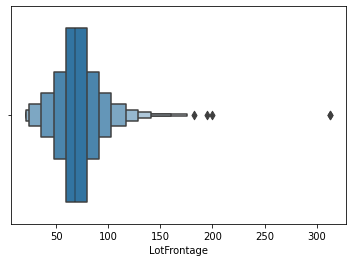

In [14]:
sns.boxenplot(df['LotFrontage'])

In [15]:
df['MasVnrType'].isna().sum()

24

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MasVnrArea'>

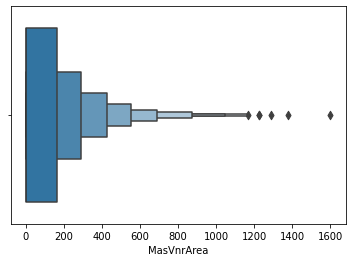

In [16]:
sns.boxenplot(df['MasVnrArea'])

In [17]:
df['PoolQC'].isna().sum()

2909

In [18]:
df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [19]:
df[df['GarageYrBlt'] == np.nan]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [20]:
df['LotFrontage'].median()

68.0

In [21]:
pd.set_option('display.max_rows', None)
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [22]:
df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

#### Lets Do Columnwise Preprocessing

In [23]:
def preprocessing(df):
    #Id-Drop - Not related to Target
    df.drop('Id',axis=1,inplace=True)
    #MSSubClass, MSZoning - ok
    #MSZoning
    df['MSZoning'].fillna(df['MSZoning'].mode()[0],inplace=True)
    #LotFrontage - Replace Nan with Median(Since Outliers are present)    
    df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
    #Alley - Replace Nan with Missing
    df['Alley'] = df['Alley'].replace(np.nan,'Missing')
    #Utilities
    df['Utilities'].fillna(df['Utilities'].mode()[0],inplace=True)
    #Exterior1st
    df['Exterior1st'].fillna(df['Exterior1st'].mode()[0],inplace=True)
    #Exterior2nd
    df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0],inplace=True)
    #MasVnrType - fill na with None
    df['MasVnrType'].fillna('None',inplace=True)
    #MasVnrArea - Replacing Nan with median - Outliers Present
    df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)
    #BsmtQual - Filling Nan with Missing
    df['BsmtQual'].fillna('Missing',inplace=True)
    #BsmtCond - Filling Nan with Missing
    df['BsmtCond'].fillna('Missing',inplace=True)
    #BsmtExposure
    df['BsmtExposure'].fillna('BsmtExposure',inplace=True)
    #BsmtFinType1
    df['BsmtFinType1'].fillna('BsmtFinType1',inplace=True)
    #BsmtFinType2
    df['BsmtFinType2'].fillna('BsmtFinType2',inplace=True)
    #BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
    df['BsmtFinSF1'].fillna(0,inplace=True)
    df['BsmtFinSF2'].fillna(0,inplace=True)
    df['BsmtUnfSF'].fillna(0,inplace=True)
    df['TotalBsmtSF'].fillna(0,inplace=True)
    df['BsmtFullBath'].fillna(0,inplace=True)
    df['BsmtHalfBath'].fillna(0,inplace=True)
    #Electrical - 1 Nan
    df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)

    
    #KitchenQual
    df['KitchenQual'].fillna(df['KitchenQual'].mode()[0],inplace=True)
    #Functional
    df['Functional'].fillna(df['Functional'].mode()[0],inplace=True)
    #FireplaceQu - Filling Nan with Missing
    df['FireplaceQu'].fillna('Missing',inplace=True)
    #GarageType - Filling Nan with Missing
    df['GarageType'].fillna('Missing',inplace=True)
    #GarageYrBlt - Filling Nan with Median Year
    df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)
    #GarageFinish - Filling Nan with Missing
    df['GarageFinish'].fillna('Missing',inplace=True)
    #GarageCars
    df['GarageCars'].fillna(df['GarageCars'].mode()[0],inplace=True)
    #GarageArea
    df['GarageArea'].fillna(df['GarageArea'].median(),inplace=True)
    #GarageQual - Filling Nan with Missing
    df['GarageQual'].fillna('Missing',inplace=True)
    #GarageCond - Filling Nan with Missing
    df['GarageCond'].fillna('Missing',inplace=True)
    #PoolQC - Fill Nan with zero-0
    df['PoolQC'].fillna(0,inplace=True)
    #Fence - Filling Nan with Missing
    df['Fence'].fillna('Missing',inplace=True)
    #MiscFeature - Filling Nan with Missing
    df['MiscFeature'].fillna('Missing',inplace=True)
    #SaleType
    df['SaleType'].fillna(df['SaleType'].mode()[0],inplace=True)


    
    
    

    
    
    
    
    # df.dropna(axis=0,inplace=True)

### Making Copy of Original Data

In [24]:
abt = df.copy()

In [25]:
abt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### Calling the Preprocessing Function

In [26]:
preprocessing(abt)

In [27]:
abt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [28]:
abt.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [29]:
abt.head()
abt.reset_index(inplace=True)

In [30]:
abt['SalePrice'].fillna('test',inplace=True)

In [31]:
X = abt.drop('SalePrice',axis=1)
y = abt['SalePrice']

In [32]:
X.head()

,index,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,0,0,Missing,Missing,0,2,2008,WD,Normal
1,1,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,0,0,Missing,Missing,0,5,2007,WD,Normal
2,2,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,0,0,Missing,Missing,0,9,2008,WD,Normal
3,3,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,0,0,Missing,Missing,0,2,2006,WD,Abnorml
4,4,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,0,0,Missing,Missing,0,12,2008,WD,Normal


In [33]:
X_dummies = pd.get_dummies(X)

In [34]:
X_dummies.head()

,index,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,1,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,2,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,3,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,4,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
cols = X_dummies.columns

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dummies)
X_scaled = pd.DataFrame(X_scaled,columns=cols)

In [37]:
X_scaled.head()

,index,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730864,0.067331,-0.191815,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.529034,0.581145,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-1.728491,-0.873616,0.511940,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.567016,1.178255,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,-1.726117,0.067331,-0.051064,0.137197,0.646183,-0.507284,0.980221,0.848965,0.338903,0.098189,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-1.723744,0.302568,-0.426400,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.567016,-0.494529,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,-1.721370,0.067331,0.699608,0.518903,1.355551,-0.507284,0.947203,0.753229,1.390216,0.469187,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [38]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
30       40000.0
31      149350.0
32      179900.0
33      165500.0
34      277500.0
35      309000.0
36      145000.0
37      153000.0
38      109000.0
39       82000.0
40      160000.0
41      170000.0
42      144000.0
43      130250.0
44      141000.0
45      319900.0
46      239686.0
47      249700.0
48      113000.0
49      127000.0
50      177000.0
51      114500.0
52      110000.0
53      385000.0
54      130000.0
55      180500.0
56      172500.0
57      196500.0
58      438780

In [39]:
new_df = pd.concat([X_scaled,y],axis=1)

In [40]:
new_df.tail()

,index,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
2914,1.720183,2.419700,-2.256162,-1.043937,-1.481920,1.289758,-0.043346,-0.682812,-0.567016,-0.968705,...,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,test
2915,1.722556,2.419700,-2.256162,-1.049263,-1.481920,-0.507284,-0.043346,-0.682812,-0.567016,-0.415500,...,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693,test
2916,1.724930,-0.873616,4.265298,1.246808,-0.772552,1.289758,-0.373528,0.561757,-0.567016,1.718287,...,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693,test
2917,1.727303,0.655424,-0.332566,0.034605,-0.772552,-0.507284,0.683057,0.370284,-0.567016,-0.228904,...,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,test
2918,1.729677,0.067331,0.230438,-0.068620,0.646183,-0.507284,0.716075,0.466021,-0.041359,0.695299,...,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,test


In [41]:
train = new_df[new_df['SalePrice'] != 'test']
test = new_df[new_df['SalePrice'] == 'test']

In [42]:
train['SalePrice']=train['SalePrice'].astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 304 entries, index to SalePrice
dtypes: float64(303), int32(1)
memory usage: 3.4 MB


C:\Users\Onkar\AppData\Local\Temp\ipykernel_11072\1080053684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SalePrice']=train['SalePrice'].astype(int)


In [43]:
test.drop('SalePrice',axis=1,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1460 to 2918
Columns: 303 entries, index to SaleCondition_Partial
dtypes: float64(303)
memory usage: 3.4 MB


C:\Users\Onkar\AppData\Local\Temp\ipykernel_11072\4073231884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('SalePrice',axis=1,inplace=True)


## Data is Prepared

### Lets jump to Modelling

#### Feature and Target Selection

In [44]:
from sklearn.model_selection import train_test_split
X = train.drop('SalePrice',axis=1)
y = train['SalePrice']

## PCA

In [45]:
# from sklearn.decomposition import PCA

In [46]:
# # Statically Significant Variable
# pca = PCA(.98)
# x_pca = pca.fit_transform(X)
# print(X.shape)
# print(x_pca.shape)

In [47]:
X.head()

,index,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730864,0.067331,-0.191815,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.529034,0.581145,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-1.728491,-0.873616,0.511940,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.567016,1.178255,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,-1.726117,0.067331,-0.051064,0.137197,0.646183,-0.507284,0.980221,0.848965,0.338903,0.098189,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-1.723744,0.302568,-0.426400,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.567016,-0.494529,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,-1.721370,0.067331,0.699608,0.518903,1.355551,-0.507284,0.947203,0.753229,1.390216,0.469187,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [48]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      18

#### Splitting into Training and Validation Data

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [50]:
from sklearn.ensemble import RandomForestRegressor

#### Training the Model

In [51]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)


RandomForestRegressor()

#### Making Predictions

In [52]:
predict = rf.predict(x_test)

In [53]:
predict

array([140885.  , 317266.83, 116222.  , 155429.14, 316424.94,  84888.  ,
       206197.5 , 153277.05,  86554.5 , 130921.  , 163652.9 , 120504.  ,
       111235.  , 205724.85, 179447.82, 129922.25, 194171.9 , 135155.  ,
       119881.  , 205665.83, 169176.  , 228833.89, 173680.9 , 122098.25,
       194070.54, 167739.67, 182251.37, 104909.  , 179357.42, 203195.16,
       127084.52, 255933.2 , 182885.91, 111742.5 , 254497.93, 146823.25,
       135085.38, 202617.3 , 304673.73, 113401.  , 122075.6 , 235402.89,
       120433.  , 378837.86, 135819.7 , 138667.74, 117508.5 , 126560.5 ,
       375246.24, 140610.32, 119524.5 , 191344.5 , 120938.82, 327951.03,
       139735.  , 236149.67, 195598.05, 149426.41, 142241.5 , 112439.6 ,
        78695.54, 146640.  , 313033.02, 280559.7 , 277277.73, 204404.19,
       111821.41, 304610.1 , 117072.5 , 163134.5 , 131240.31, 131796.04,
       111879.  ,  93017.5 , 428036.47, 168888.88, 304733.54, 297228.32,
       138333.  , 122412.  , 102765.5 , 100336.  , 

### Evaluation on Validation Data

In [54]:
from sklearn.metrics import mean_absolute_percentage_error

In [55]:
print(f'{mean_absolute_percentage_error(y_test,predict)*100} percent')

9.979409762289388 percent


#### The Mean Absolute Percentage Error from our Model is 10 percent approximately

##### Lets try to decrease the Mean Absolute Percentage Error to 5 percent maybe

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
cross_val_score(rf, X, y, cv=5, scoring=None)

array([0.87101494, 0.84713575, 0.87063281, 0.88107073, 0.81685067])

## GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

parameter_list = {
    'max_depth' : [10,12,15,20,25,30,35,40,50]
    # 'min_samples_split' : [2,3,4,6,8,10,12,15,20,25,30,35,40],
    
}

cv_dtree = GridSearchCV(rf, cv=10, param_grid = parameter_list)

cv_dtree.fit(x_train, y_train)

print('Best Parameters using grid search: \n', cv_dtree.best_params_)

### Setting Best Parameters

In [59]:
rf.set_params( 
                     max_depth = 20, 
                     min_samples_split = 2)

RandomForestRegressor(max_depth=20)

In [60]:
cross_val_score(rf, X, y, cv=5, scoring=None)

array([0.86882898, 0.84682696, 0.87464461, 0.88616935, 0.81393951])

## Predicting on Test Set

In [61]:
predict = rf.predict(test)

In [62]:
predict

array([125750.37, 156593.5 , 188938.7 , ..., 153840.5 , 116838.9 ,
       228121.91])

In [63]:
submission = pd.DataFrame([id, predict]).T
submission.columns = ['Id', 'SalePrice']

In [68]:
submission.head()

,Id,SalePrice
0,1461,125750.37
1,1462,156593.50
2,1463,188938.70
3,1464,189116.40
4,1465,206899.70


In [67]:
submission['Id'] = submission['Id'].astype(int)

In [69]:
submission.to_csv('kaggle_submission_rf.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   float64
 1   SalePrice  1459 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB
